# Numerische Behandlung von gewöhnlichen Differentialgleichungen
## Theoretische Grundlagen
Eine (explizite) gewöhnliche Differentialgleichung ist von der Form $y\prime=f(x,y)$, mit einer Funktion $f: \mathbb{R}\times\mathbb{R}\to\mathbb{R}$. Es wird eine $Funktion$ $y: \mathbb{R}\to\mathbb{R}$ gesucht, die einmal (stetig) differenzierbar ist und die DGL $y(x)\prime=f(x,y(x))$ erfüllt. Da diese Aufgabe unendlich viele Lösungen haben kann, wird von einem sogenannten Anfagswertproblem (AWP) gesprochen, bei dem man zusätzlich die Bedingung aufstellt, dass die Funktion $y$ einen bestimmen Anfangswert $y_0$ (meist bei $x=0$) annimmt. Die zu betrachtende Aufgabe wird üblicherweise so gestellt:

Finde ein $y\in C^1([0,\infty))$, sodass gilt:
$$y(x)\prime = f(x,y(x)),\quad\forall x\in[0,\infty) \\
y(0) = y_0$$

Je nachdem, welche Eigenschaften die rechte Seite $f$ hat, hat auch $y$ daraus ableitbare Eigenschaften (da $f$ direkte Auswirkung zumindest auf die Ableitung von $y$ hat). Sind die Eigenschaften von $f$ hinreichend gut, so ist die Aufgabe eindeutig lösbar. Ein Kriterium liefert der Satz von Picard-Lindelöf. Ist $f$ bzgl. der zweiten Variable (also die Funktion $y$) Lipschitz-stetig, so ist die Aufgabe eindeutig lösbar.

Für $f$ der Form $f(x,y) = a(x)\cdot y + b(x)$ heißt die DGL linear (falls b(x)=0 homogen, sonst inhomogen). Hängt $f$ nicht explizit von der freien Variable $x$ ab, so nennt man die DGL autonom. In diesem fall gilt für eine Lösung $y$, dass y(x-a) $(a\in\mathbb{R})$ ebenfalls Lösungen der DGL sind. 

### Beispiele

$y\prime = \lambda\cdot y$, $\lambda\in\mathbb{R}$ $(f(x,y)=\lambda\cdot y)$ ist eindeutig lösbar

$y\prime = x\cdot y$+x^2, $(f(x,y)= x\cdot y+x^2)$ ist eindeutig lösbar

$y\prime = \sin(y)$, $(f(x,y)=\sin(y))$ ist eindeutig lösbar

$y\prime = \sqrt{y}$, $(f(x,y)=\sqrt{y})$ ist NICHT eindeutig lösbar

## Stabilitätsverhalten von Lösungen von gewöhnlichen Differentialgleichungen

Unter "Stabilität" einer Lösung ist ihr Langzeitverhalten zu verstehen, vorausgesetzt, das Existenzintervall ist ausreichend groß.
Eine Lösung $y$ heißt stabil, wenn wir nur hinreichend nah am gegebenen Anfangswert starten müssen, sodass die "fehlerbehaftete" Lösung maximal $\varepsilon$ von der echten Lösung entfernt ist (und das zu jeder Stelle $x$).
In Formeln ausgedrückt bedeutet dies:

$y$ stabil genau dann wenn: $\forall\varepsilon>0\;\exists\delta>0: |y(0)-y_\delta(0)|<\delta \Rightarrow |y(x)-y_\delta(x)|<\varepsilon (\forall x\geq 0)$, wobei $y_\delta$ die Lösung der DGL mit dem um maximal $\delta$ gestörten Anfangswert ist.

Eine Lösung heißt asymptotisch stabil, falls der Fehler $|y(x)-y_\delta(x)|$ für $x\to\infty$ gegen Null geht. Damit wäre eine asymptotisch stabile Lösung auch (normal) stabil.

### Beispiele

$y\prime = 2\,y$, $y(0) = y_0$. Die spezifische Lösung zu jedem Anfangswert ist instabil. Die Lösung zu diesem AWP ist $y(x) = y_0\cdot e^{2x}$. Wird der Anfangswert um $\delta>0$ gestört, ist die dazugehörige Lösung $y_\delta(x) = (y_0+\delta)\cdot e^{2x}$, so gilt für die Differenz $|y(x)-y_\delta(x)|= |\delta e^{2x}|\to\infty (x\to\infty)$.

$y\prime = -2\,y$, $y(0) = y_0$. Die spezifische Lösung zu jedem Anfangswert ist entgegen (sogar asymptotisch) stabil. Die Lösung zu diesem AWP ist $y(x) = y_0\cdot e^{-2x}$. Wird der Anfangswert um $\delta>0$ gestört, ist die dazugehörige Lösung $y_\delta(x) = (y_0+\delta)\cdot e^{-2x}$, so gilt für die Differenz $|y(x)-y_\delta(x)|= |\delta e^{-2x}|\to 0 (x\to\infty)$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
class ODE:
    
    def __init__(self,RHS,x0,xend,y0):
        self.__RHS = RHS
        self.__y0   = y0
        if x0 < xend:
            self.__x0   = x0
            self.__xend = xend
        elif x0 > xend:
            print("Warning: x0 is greater than xend! It was implicit switched.")
            self.__x0   = xend
            self.__xend = x0
        else:
            print("Warning: x0 equal to xend!")
            # TODO: Fehlermeldung!
          
    def directionField(self,xmin,xmax,ymin,ymax,nx=20,ny=20):
        if xmin>xmax:
            print("Warning: In method 'directionField' xmin greater than xmax!\n It has been switched.")
            tmp = xmin
            xmin = xmax
            xmax = xmin
        if ymin>ymax:
            print("Warning: In method 'directionField' ymin greater than xyax!\n It has been switched.")
            tmp = ymin
            ymin = ymax
            ymax = ymin    
        
        X,Y = np.meshgrid(np.linspace(xmin,xmax,nx),
                          np.linspace(ymin,ymax,ny))
        X_dir = 0*X+1
        Y_dir = self.__RHS(X,Y)
        L = np.sqrt(X_dir*X_dir+Y_dir*Y_dir)
        plt.quiver(X, Y, X_dir/L, Y_dir/L)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    
    def explicitEuler(self,n):
        self.__xgrid = np.linspace(self.__x0,self.__xend,n)
        self.__ygrid = np.linspace(0,0,n)
        self.__ygrid[0] = self.__y0
        h = (self.__xend-self.__x0)/(n-1)
        for k in range(n-1):
            print("Progress: %6.2f %%" % (k+1/(n-1)),end='\r')
            self.__ygrid[k+1] = self.__ygrid[k]+h*self.__RHS(self.__xgrid[k],self.__ygrid[k])
    
    def solve(self,n,method='explE'):
        if method=='explE':
            self.explicitEuler(n)
        else:
            print('Method not defined!')
            
    def show(self,directions='off'):
        plt.plot(self.__xgrid,self.__ygrid,color='red')
        if directions != 'off':
            self.directionField(self.__x0,self.__xend,min(self.__ygrid),max(self.__ygrid))
        else:
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()
        #TODO: Legende einfügen, Listenstruktur in den Plots

In [78]:
f = lambda x,y: 2*np.sin(y)
var = ODE(f,0,10,1)

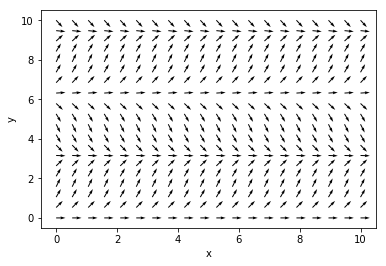

In [79]:
var.directionField(0,10,0,10)

In [80]:
var.solve(50)

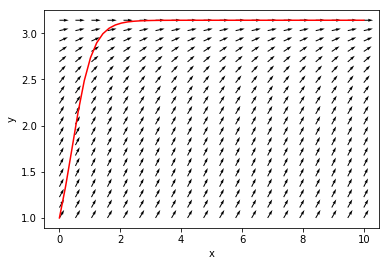

In [81]:
var.show(directions='on')